In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/tittanic_train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x = df.drop('Survived', axis=1)
y = df['Survived']


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [8]:
#random imputation
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [9]:
x_train['Age_imputed'].isnull().sum()

0

<ipython-input-10-a43f1023efe8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'], label='Original')
<ipython-input-10-a43f1023efe8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'], label='Imputed')


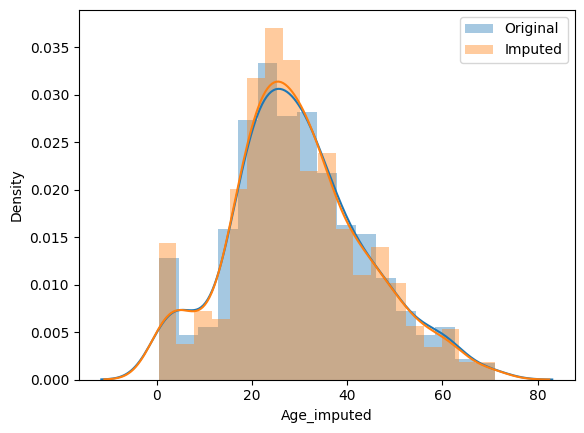

In [10]:
sns.distplot(x_train['Age'], label='Original')
sns.distplot(x_train['Age_imputed'], label='Imputed')

plt.legend()
plt.show()

In [11]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  201.3804477409567


In [12]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,58.004954
Age,71.512440,204.349513,204.349513
Age_imputed,58.004954,204.349513,201.380448


<Axes: >

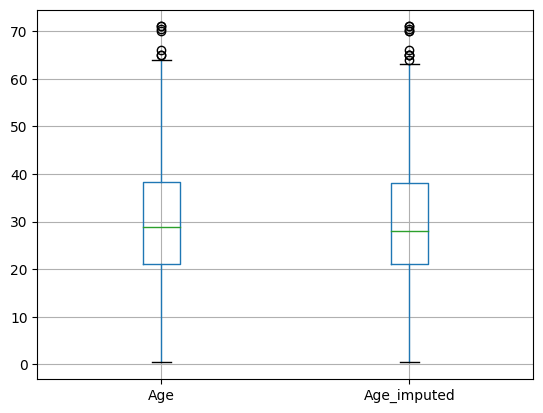

In [13]:
x_train[['Age', 'Age_imputed']].boxplot()

In [15]:
data = pd.read_csv('/content/train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [16]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [18]:
x = data
y = data['SalePrice']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [21]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

<ipython-input-21-37d9b76cce28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
<ipython-input-21-37d9b76cce28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
<ipython-input-21-37d9b76cce28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [22]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts() / len(x_train)
    ], axis=1
)
temp.columns = ['original', 'imputed']

In [23]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.039384
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [24]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts() / len(x_train)
], axis=1)

temp.columns = ['original', 'imputed']

In [25]:
temp

,original,imputed
Gd,0.494272,0.493151
TA,0.412439,0.411815
Fa,0.040917,0.041096
Po,0.027823,0.028253
Ex,0.024550,0.025685


<ipython-input-26-f0bb78fb49f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
<ipython-input-26-f0bb78fb49f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']

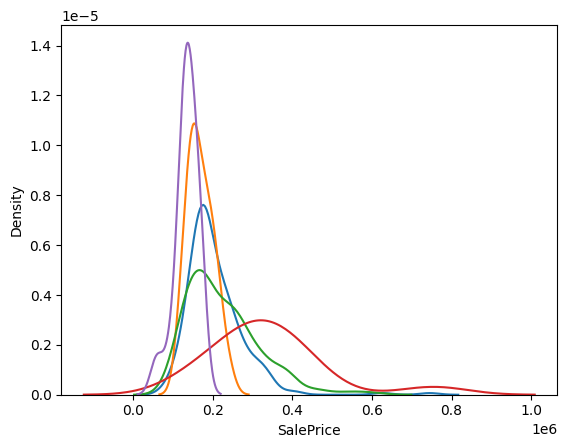

In [26]:
for category in x_train['FireplaceQu'].dropna().unique():
  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
plt.show()

<ipython-input-27-30913fb4c7e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
<ipython-input-27-30913fb4c7e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firep

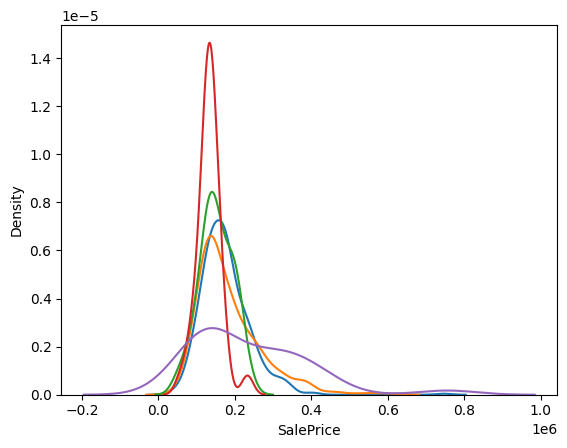

In [27]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
plt.show()